In [1]:
import numpy as np
import pyspark
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, col, isnan, when
from pyspark.sql.types import IntegerType, DoubleType, BooleanType

In [2]:
spark = SparkSession.builder.appName("diabetes_indicators").getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/11 14:36:33 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# Load the Dataset

In [3]:
df = spark.read.csv("./data/diabetes/diabetes_data_with_missing.csv", header=True, inferSchema=True)
df.show(5, truncate=False)

+------------+------+--------+---------+----+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+
|Diabetes_012|HighBP|HighChol|CholCheck|BMI |Smoker|Stroke|HeartDiseaseorAttack|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex|Age |Education|Income|
+------------+------+--------+---------+----+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+
|0.0         |1.0   |1.0     |1.0      |40.0|1.0   |0.0   |0.0                 |0.0         |0.0   |1.0    |0.0              |1.0          |0.0        |5.0    |18.0    |15.0    |1.0     |0.0|9.0 |4.0      |3.0   |
|0.0         |0.0   |0.0     |0.0      |25.0|1.0   |0.0   |0.0                 |1.0         |0.0   |0.0    |0.0              |0.0          |1.0 

In [4]:
df.columns

['Diabetes_012',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

# Data Exploration

## - Data Statistics

In [5]:
df.describe().toPandas()

,summary,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,count,253680,253411,253401,253410,253406,253444,253475,253451,253399,...,253439,253441,253446,253428,253421,253399,253447,253430,253436,253446
1,mean,0.29692131819615264,0.4289987411754028,0.4241695968050639,0.9626889230890652,28.38258762618091,0.4431945518536639,0.0405878291744748,0.09417204903511922,0.7565183761577591,...,0.9510612021038594,0.08420105665618428,2.5113791497991684,3.184790157362249,4.241779489466145,0.16821297637322957,0.440277454457934,8.032194294282444,5.050403257627172,6.053723475612162
2,stddev,0.6981597284091031,0.49493412480399485,0.49421727392047904,0.18952335527241704,6.6087890073425015,0.4967636407225225,0.1973337551571104,0.2920685035837951,0.4291841674694843,...,0.2157405284276439,0.2776896522604429,1.0685193683602476,7.4127600339798505,8.717648444000648,0.37405604274941684,0.4964213833873878,3.054401365184923,0.9857751837378494,2.0712367098525144
3,min,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,max,2.0,1.0,1.0,1.0,98.0,1.0,1.0,1.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,1.0,13.0,6.0,8.0


## - Missing Data Statistics

In [6]:
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show(vertical=True)

-RECORD 0-------------------
 Diabetes_012         | 0   
 HighBP               | 269 
 HighChol             | 279 
 CholCheck            | 270 
 BMI                  | 274 
 Smoker               | 236 
 Stroke               | 205 
 HeartDiseaseorAttack | 229 
 PhysActivity         | 281 
 Fruits               | 259 
 Veggies              | 221 
 HvyAlcoholConsump    | 262 
 AnyHealthcare        | 241 
 NoDocbcCost          | 239 
 GenHlth              | 234 
 MentHlth             | 252 
 PhysHlth             | 259 
 DiffWalk             | 281 
 Sex                  | 233 
 Age                  | 250 
 Education            | 244 
 Income               | 234 



## - Data Info

In [7]:
df.printSchema()

root
 |-- Diabetes_012: double (nullable = true)
 |-- HighBP: double (nullable = true)
 |-- HighChol: double (nullable = true)
 |-- CholCheck: double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoker: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- HeartDiseaseorAttack: double (nullable = true)
 |-- PhysActivity: double (nullable = true)
 |-- Fruits: double (nullable = true)
 |-- Veggies: double (nullable = true)
 |-- HvyAlcoholConsump: double (nullable = true)
 |-- AnyHealthcare: double (nullable = true)
 |-- NoDocbcCost: double (nullable = true)
 |-- GenHlth: double (nullable = true)
 |-- MentHlth: double (nullable = true)
 |-- PhysHlth: double (nullable = true)
 |-- DiffWalk: double (nullable = true)
 |-- Sex: double (nullable = true)
 |-- Age: double (nullable = true)
 |-- Education: double (nullable = true)
 |-- Income: double (nullable = true)



In [8]:
casted_cols = list()
for colname in df.columns:
    if colname not in ["BMI", "PhysHlth", "MentHlth"]:
        casted_cols.append(f"cast({colname} as int) {colname}")
    else:
        casted_cols.append(f"cast({colname} as double) {colname}")

        
df = df.selectExpr(*casted_cols)
df.printSchema()

root
 |-- Diabetes_012: integer (nullable = true)
 |-- HighBP: integer (nullable = true)
 |-- HighChol: integer (nullable = true)
 |-- CholCheck: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoker: integer (nullable = true)
 |-- Stroke: integer (nullable = true)
 |-- HeartDiseaseorAttack: integer (nullable = true)
 |-- PhysActivity: integer (nullable = true)
 |-- Fruits: integer (nullable = true)
 |-- Veggies: integer (nullable = true)
 |-- HvyAlcoholConsump: integer (nullable = true)
 |-- AnyHealthcare: integer (nullable = true)
 |-- NoDocbcCost: integer (nullable = true)
 |-- GenHlth: integer (nullable = true)
 |-- MentHlth: double (nullable = true)
 |-- PhysHlth: double (nullable = true)
 |-- DiffWalk: integer (nullable = true)
 |-- Sex: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- Income: integer (nullable = true)



## - Data Visualization

### - Single Source of Data Visualization

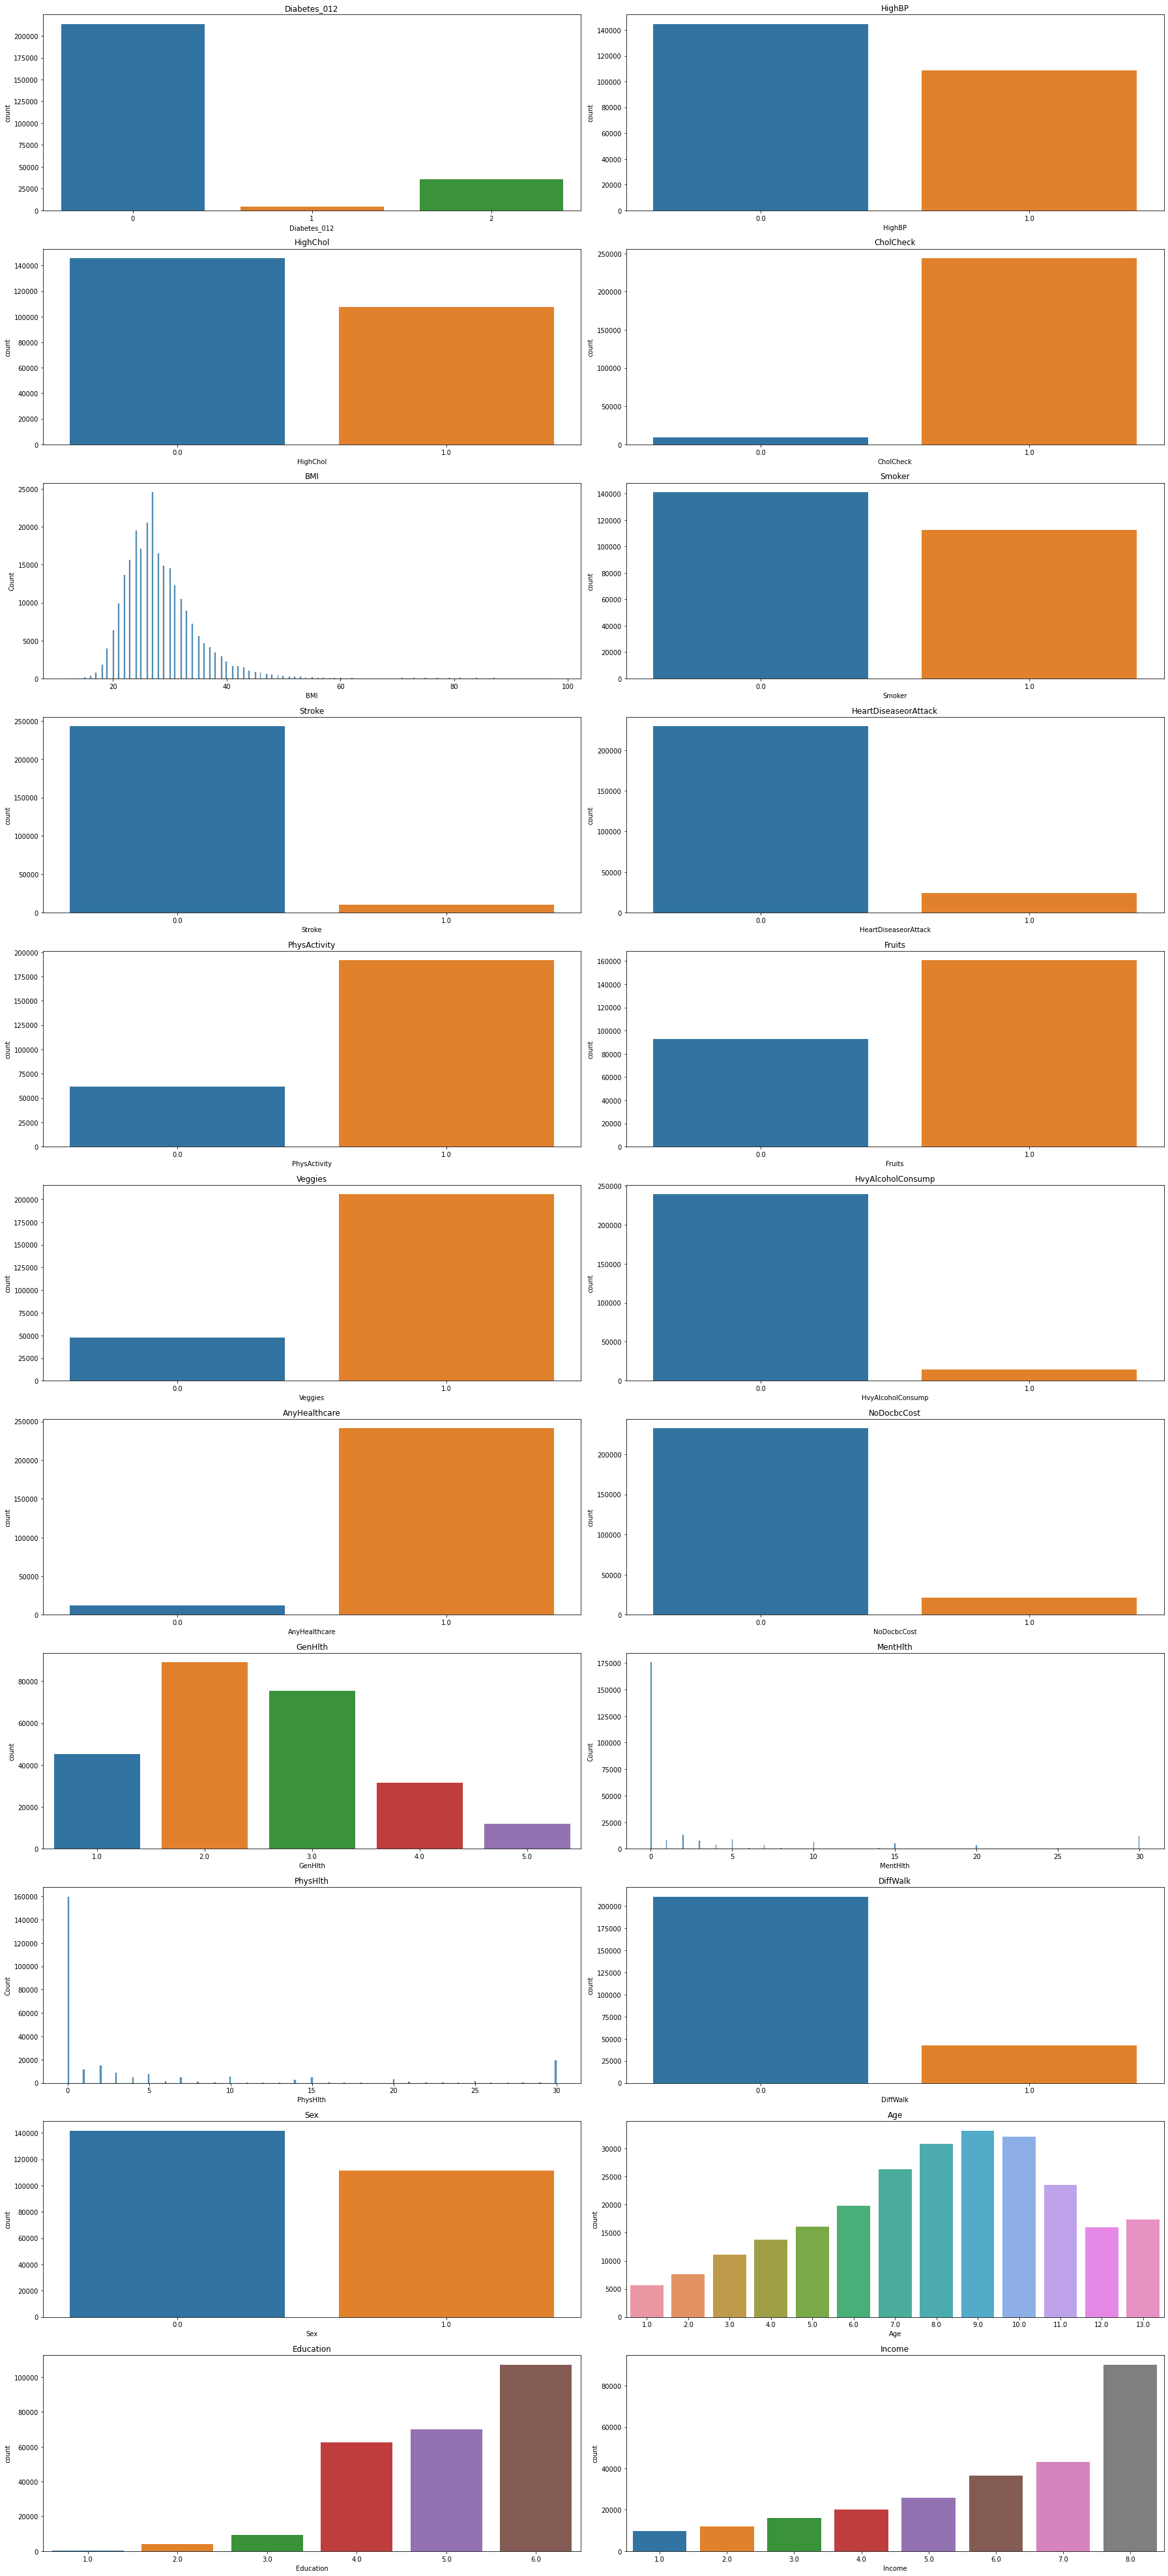

In [9]:
fig, axs = plt.subplots(11, 2, figsize=(25, 55))
axs = axs.flatten()

for idx, colname in enumerate(df.columns):
    axs[idx].set_title(f"{colname}")
    if colname not in ["PhysHlth", "MentHlth", "BMI"]:
        sns.countplot(x=colname, data=df.select(colname).toPandas(), ax=axs[idx])
    else:
        sns.histplot(x=colname, data=df.select(colname).toPandas(), ax=axs[idx])

plt.tight_layout()
plt.show()

In [10]:
if not os.path.exists("./media"):
    os.mkdir("./media")
fig.savefig("./media/categorical_single_dist.png")

### - Correlation between BMI and different variables

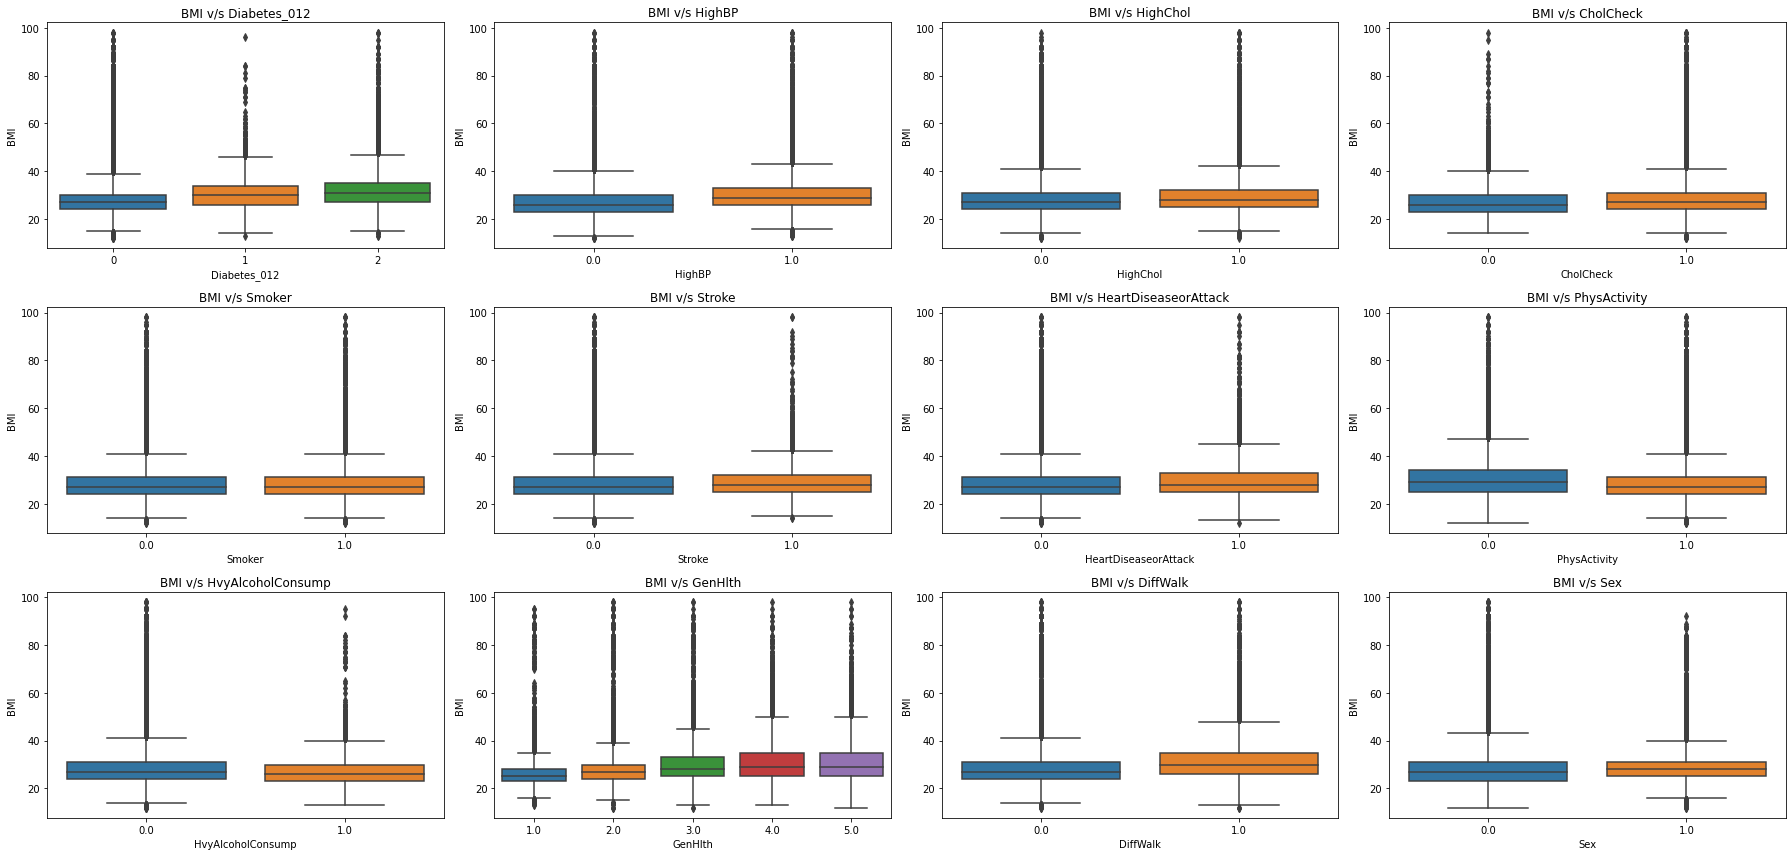

In [11]:
fig, axs = plt.subplots(3, 4, figsize=(25, 12))
axs = axs.flatten()

req_col = list(filter(lambda x: x not in  ["Fruits", "Veggies", "AnyHealthcare", "NoDocbcCost", "MentHlth", "PhysHlth", 
                                           "Age", "Education", "Income", "BMI"], df.columns))


for i, colname in enumerate(req_col):
    axs[i].set_title(f"BMI v/s {colname}")
    sns.boxplot(x=colname, y="BMI", data=df.select(colname, "BMI").toPandas(), ax=axs[i])

plt.tight_layout()
plt.show()

In [12]:
fig.savefig("./media/bmi_vs_other_cats.png")

### - Correlation between Diabetes and PhysHlth

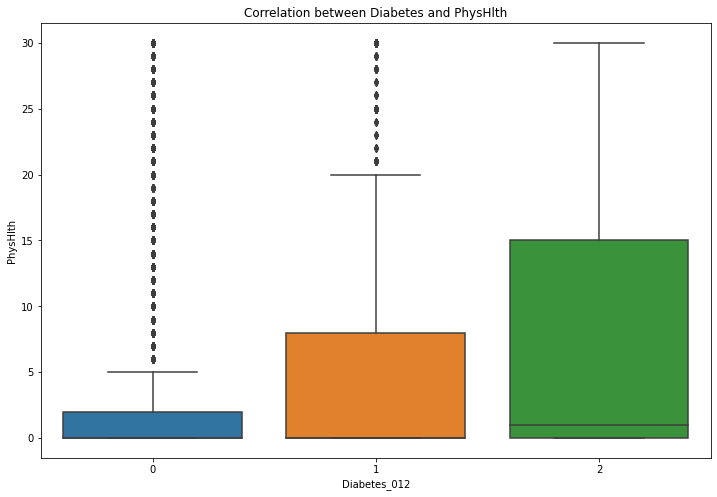

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.set_title("Correlation between Diabetes and PhysHlth")
sns.boxplot(x="Diabetes_012", y="PhysHlth", data=df.select("Diabetes_012", "PhysHlth").toPandas(), ax=ax)
plt.show()

In [14]:
fig.savefig("./media/corr_diabetes_physhlth.png")

### - Correlation between MentlHlth and Diabetes

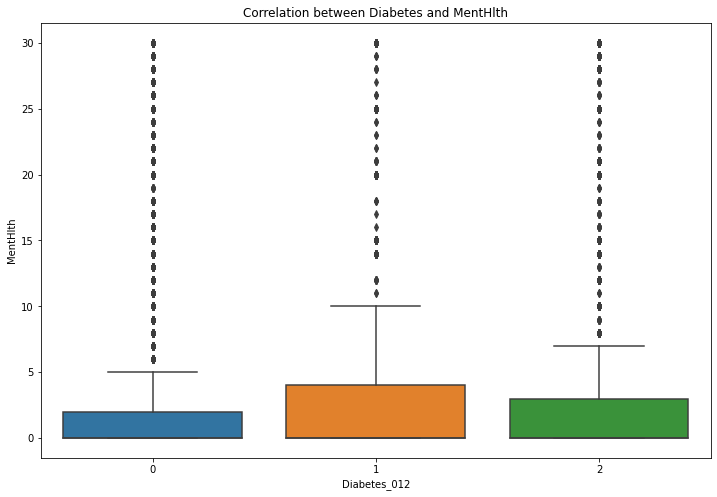

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.set_title("Correlation between Diabetes and MentHlth")
sns.boxplot(x="Diabetes_012", y="MentHlth", data=df.select("Diabetes_012", "MentHlth").toPandas(), ax=ax)
plt.show()

In [16]:
fig.savefig("./media/corr_diabetes_mnthlth.png")

### - Correlation between Diabetes and Smoker

In [17]:
df.select("Diabetes_012", "Smoker").na.drop().crosstab("Diabetes_012", "Smoker").show()

+-------------------+------+-----+
|Diabetes_012_Smoker|     0|    1|
+-------------------+------+-----+
|                  1|  2348| 2280|
|                  0|121757|91746|
|                  2| 17014|18299|
+-------------------+------+-----+



### - Correlation between Diabetes and High Cholestrol

In [18]:
df.select("Diabetes_012", "HighChol").na.drop().crosstab("Diabetes_012", "HighChol").show()

+---------------------+------+-----+
|Diabetes_012_HighChol|     0|    1|
+---------------------+------+-----+
|                    1|  1754| 2872|
|                    0|132521|80953|
|                    2| 11641|23660|
+---------------------+------+-----+



### - Correlation between Diabetes and Fruits

In [19]:
df.select("Diabetes_012", "Fruits").na.drop().crosstab("Diabetes_012", "Fruits").show()

+-------------------+-----+------+
|Diabetes_012_Fruits|    0|     1|
+-------------------+-----+------+
|                  1| 1839|  2789|
|                  0|76214|137266|
|                  2|14644| 20669|
+-------------------+-----+------+



### - Correlation between Diabetes and Veggies

In [20]:
df.select("Diabetes_012", "Veggies").na.drop().crosstab("Diabetes_012", "Veggies").show()

+--------------------+-----+------+
|Diabetes_012_Veggies|    0|     1|
+--------------------+-----+------+
|                   1| 1069|  3554|
|                   0|38136|175383|
|                   2| 8603| 26714|
+--------------------+-----+------+



### - Correlation between Diabetes and GenHlth

In [21]:
df.select("Diabetes_012", "GenHlth").na.drop().crosstab("Diabetes_012", "GenHlth").show()

+--------------------+-----+-----+-----+-----+----+
|Diabetes_012_GenHlth|    1|    2|    3|    4|   5|
+--------------------+-----+-----+-----+-----+----+
|                   2| 1138| 6376|13441| 9780|4575|
|                   1|  313| 1212| 1728| 1025| 351|
|                   0|43810|81416|60396|20740|7145|
+--------------------+-----+-----+-----+-----+----+



### - Correlation between HvgAlcoholConsumption and Diabetes

In [22]:
df.select("Diabetes_012", "HvyAlcoholConsump").na.drop().crosstab("Diabetes_012", "HvyAlcoholConsump").show()

+------------------------------+------+-----+
|Diabetes_012_HvyAlcoholConsump|     0|    1|
+------------------------------+------+-----+
|                             1|  4420|  208|
|                             0|200280|13200|
|                             2| 34478|  832|
+------------------------------+------+-----+



### - Correlation between Diabetes and Sex

In [23]:
df.select("Diabetes_012", "Sex").na.drop().crosstab("Diabetes_012", "Sex").show()

+----------------+------+-----+
|Diabetes_012_Sex|     0|    1|
+----------------+------+-----+
|               1|  2603| 2023|
|               0|120859|92649|
|               2| 18398|16915|
+----------------+------+-----+



### - Correlation between Diabetes and Age

In [24]:
df.select("Diabetes_012", "Age").na.drop().crosstab("Diabetes_012", "Age").show()

+----------------+----+-----+-----+-----+-----+----+-----+-----+-----+-----+-----+-----+-----+
|Diabetes_012_Age|   1|   10|   11|   12|   13|   2|    3|    4|    5|    6|    7|    8|    9|
+----------------+----+-----+-----+-----+-----+----+-----+-----+-----+-----+-----+-----+-----+
|               2|  78| 6551| 5133| 3401| 3207| 140|  314|  623| 1048| 1742| 3085| 4260| 5725|
|               0|5597|24912|17773|12121|13692|7399|10731|13039|14923|17745|22787|25995|26784|
|               1|  21|  697|  601|  444|  453|  54|   72|  142|  163|  310|  418|  548|  702|
+----------------+----+-----+-----+-----+-----+----+-----+-----+-----+-----+-----+-----+-----+



### - Correlation between Diabetes and Education

In [25]:
df.select("Diabetes_012", "Education").na.drop().crosstab("Diabetes_012", "Education").show()

+----------------------+---+----+----+-----+-----+-----+
|Diabetes_012_Education|  1|   2|   3|    4|    5|    6|
+----------------------+---+----+----+-----+-----+-----+
|                     2| 47|1181|2293|11054|10346|10390|
|                     1|  2| 161| 314| 1346| 1333| 1470|
|                     0|125|2698|6859|50295|58165|95357|
+----------------------+---+----+----+-----+-----+-----+

